In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f"Date range of gold prices avaliable from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][846]}")

Date range of gold prices avaliable from - 1950-01 to 2020-07


In [5]:
date = pd.date_range (start = '1/1/1950' , end = '8/1/2020', freq= 'M')

In [6]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [48]:
df.set_index(['Month'], inplace=True)
df.head()

,Price,Year,Month_Name
Month,,,
1950-01-31,34.73,1950,1
1950-02-28,34.73,1950,2
1950-03-31,34.73,1950,3
1950-04-30,34.73,1950,4
1950-05-31,34.73,1950,5


In [50]:
df=df.drop(["Year", "Month_Name"], axis=1)
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


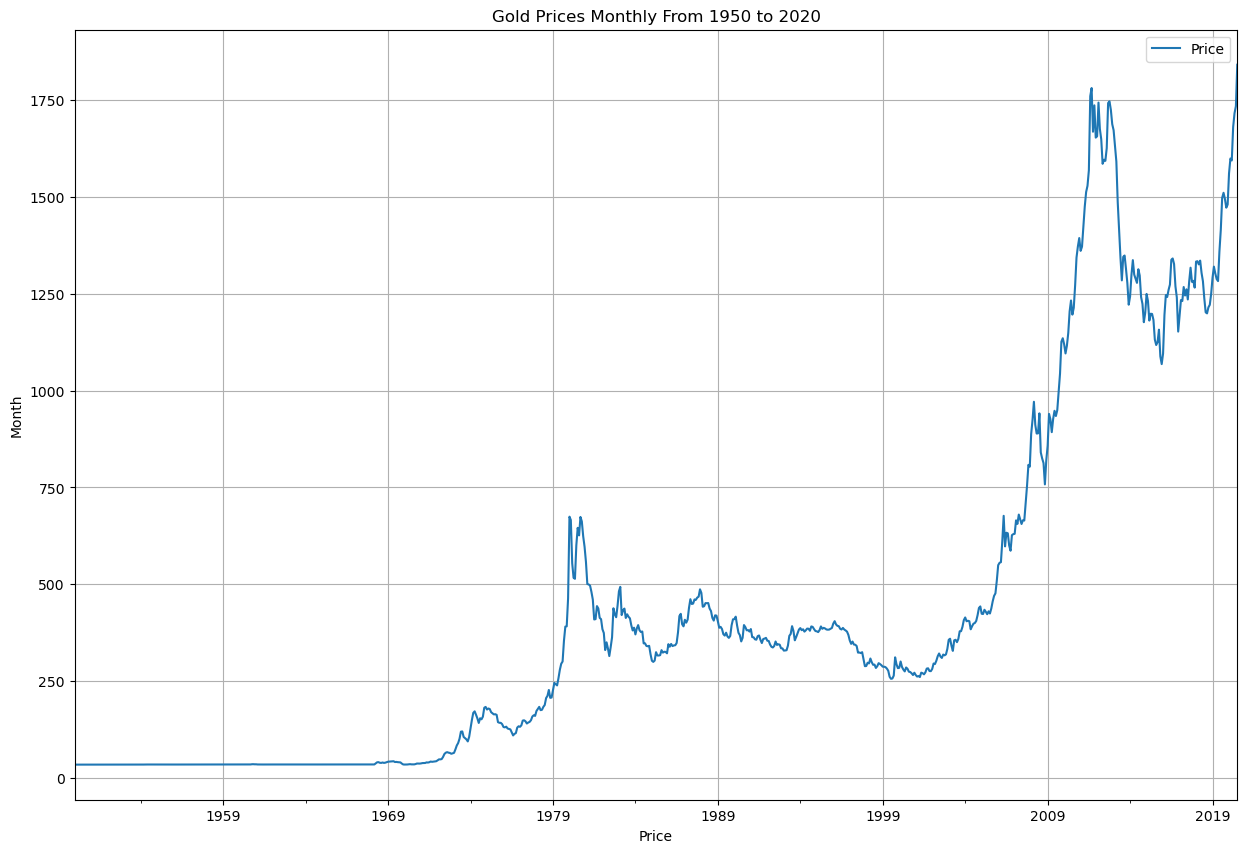

In [51]:
df.plot(figsize=(15,10))
plt.title("Gold Prices Monthly From 1950 to 2020")
plt.ylabel('Month')
plt.xlabel('Price')
plt.grid();

In [52]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


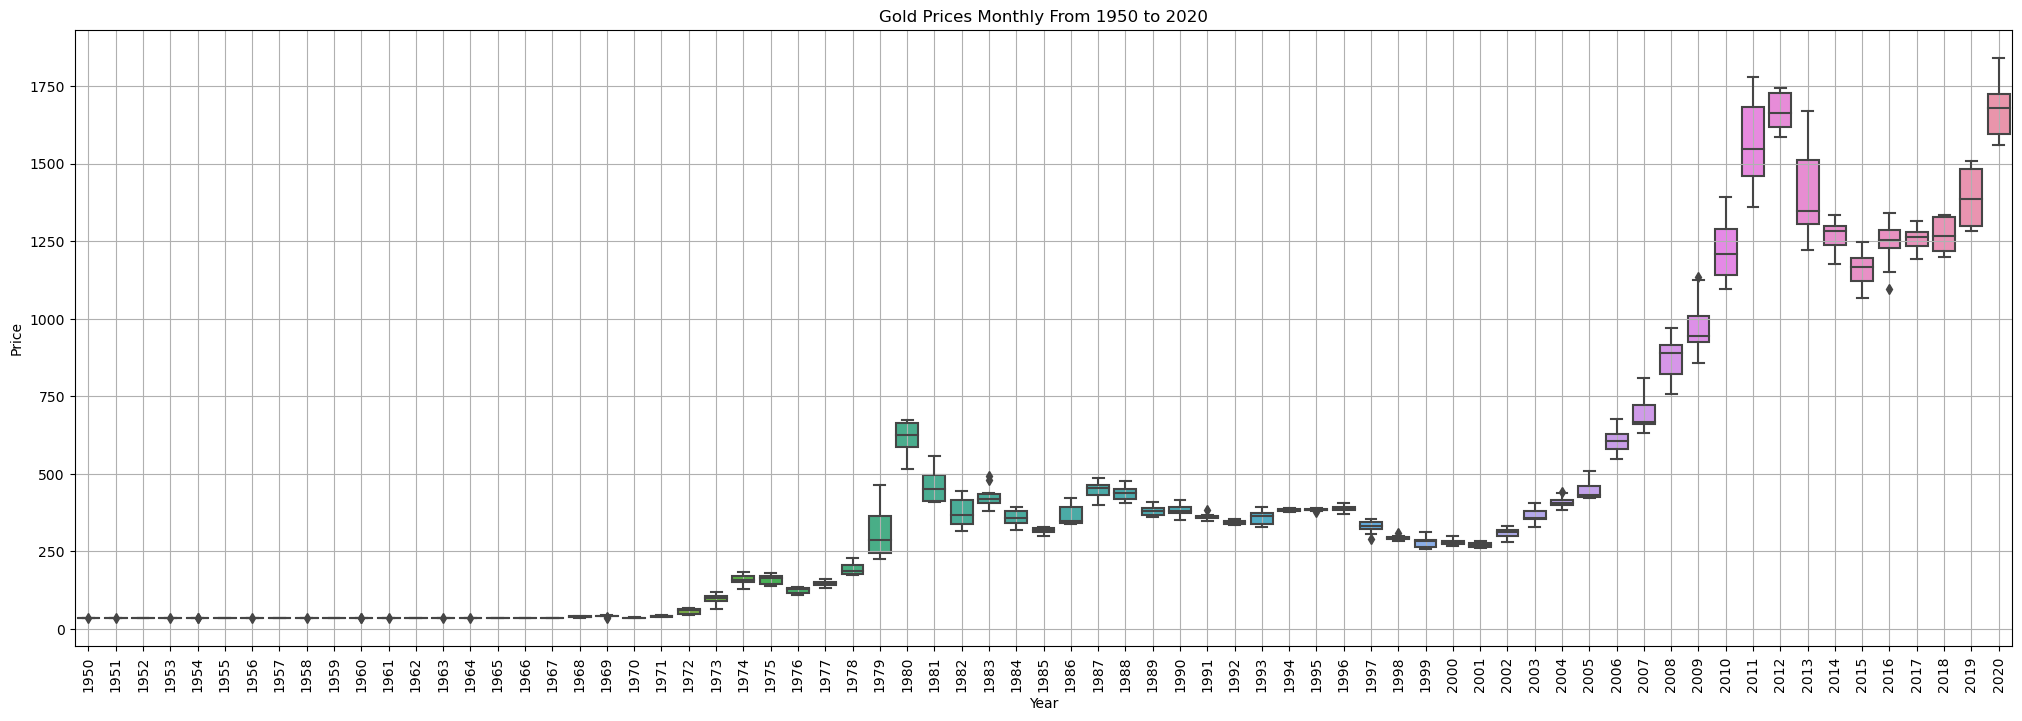

In [57]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year , y = df.values[:,0], ax=ax)
plt.title("Gold Prices Monthly From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.grid();

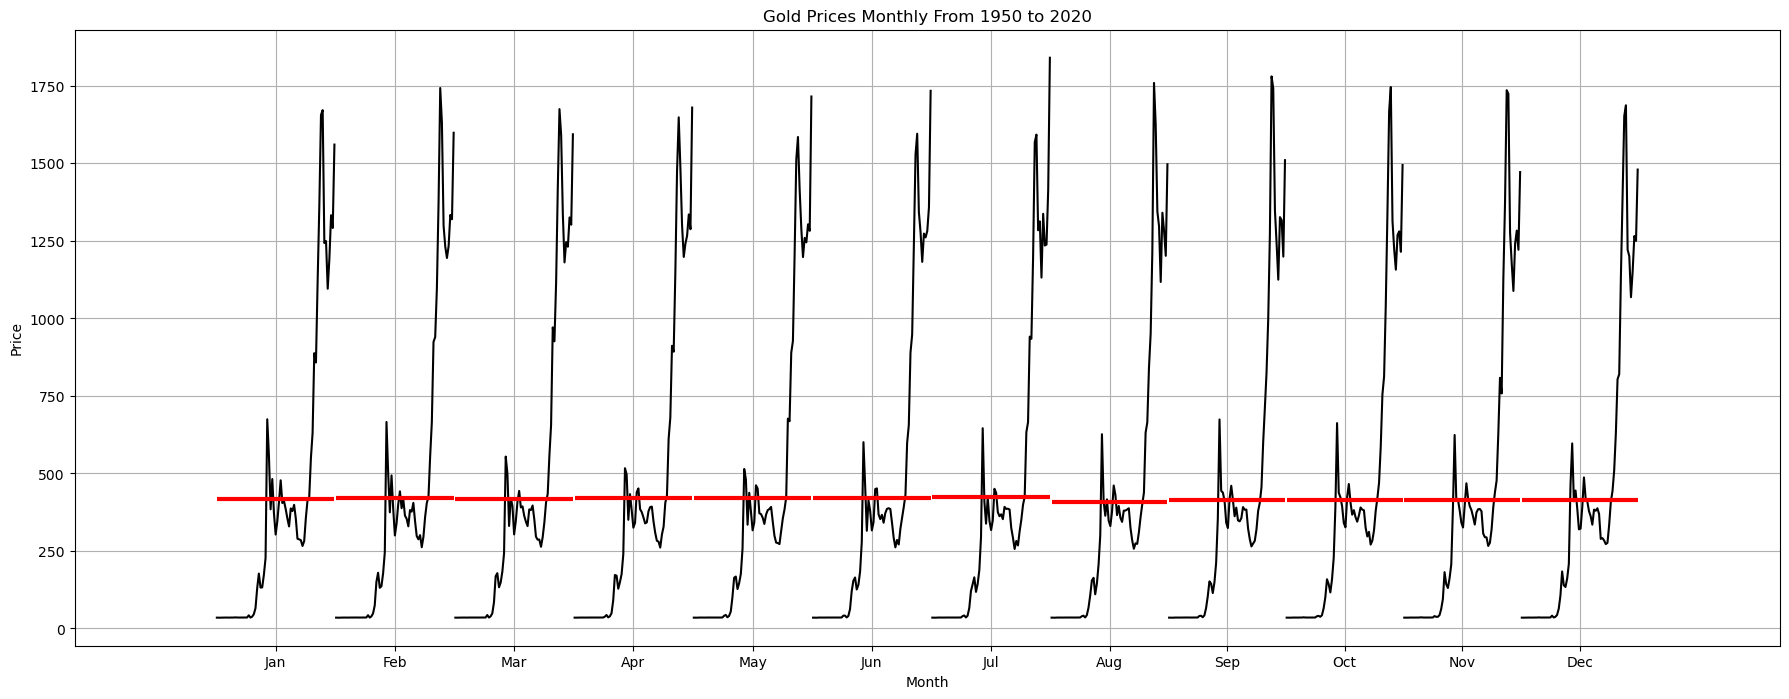

In [58]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel= 'Gold Price', ax =ax)
plt.title("Gold Prices Monthly From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Month')
plt.grid();

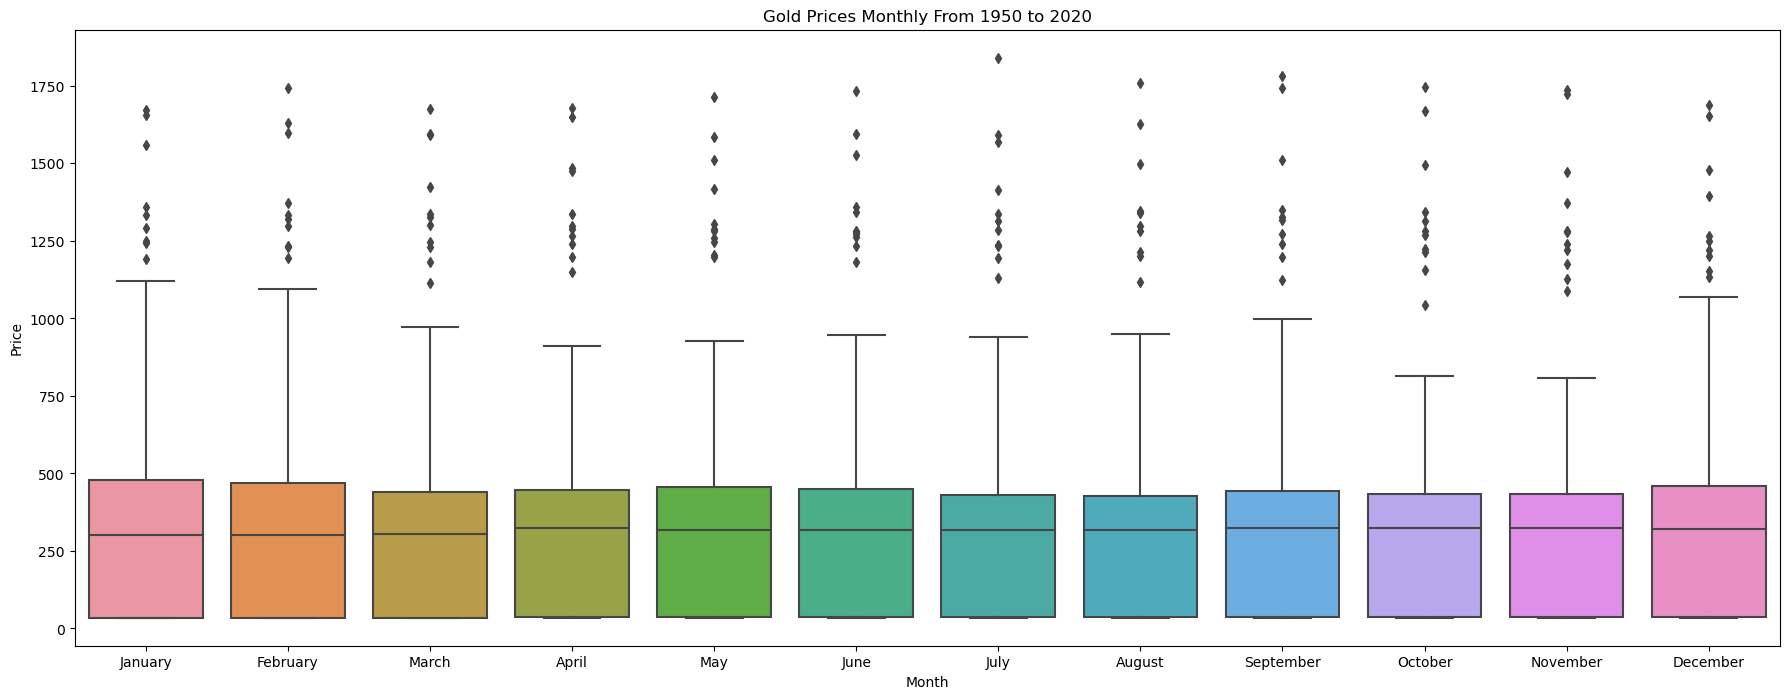

In [59]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)
plt.title("Gold Prices Monthly From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Month')
plt.show()

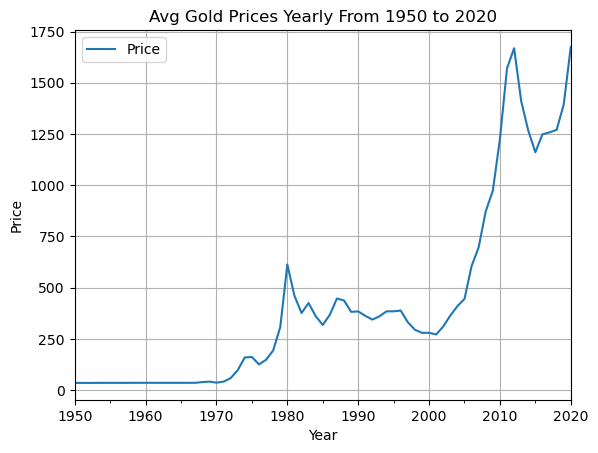

In [56]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Avg Gold Prices Yearly From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Year')
plt.grid();

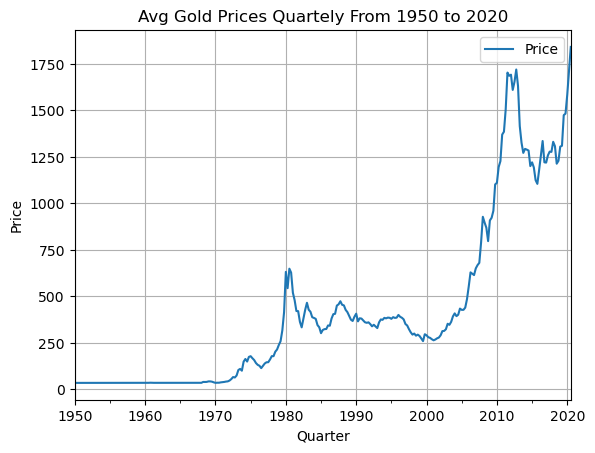

In [60]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title("Avg Gold Prices Quartely From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Quarter')
plt.grid();

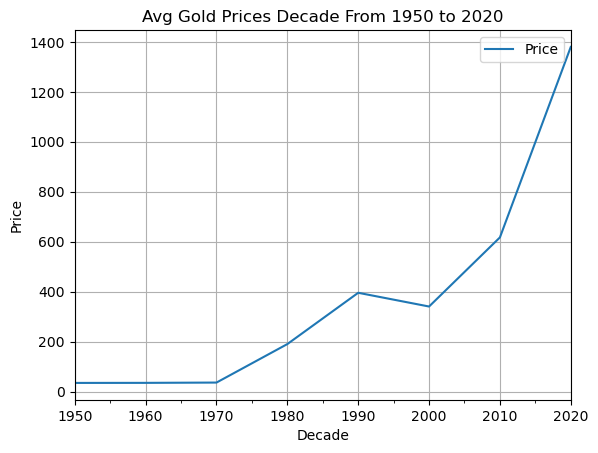

In [61]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Avg Gold Prices Decade From 1950 to 2020")
plt.ylabel('Price')
plt.xlabel('Decade')
plt.grid();

In [63]:
df_1 = df.groupby(df.index.year).mean().rename(columns= {'Price' : 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price' : 'Std'}), left_index= True, right_index= True)
df_1['Cov_ptc'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_ptc
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


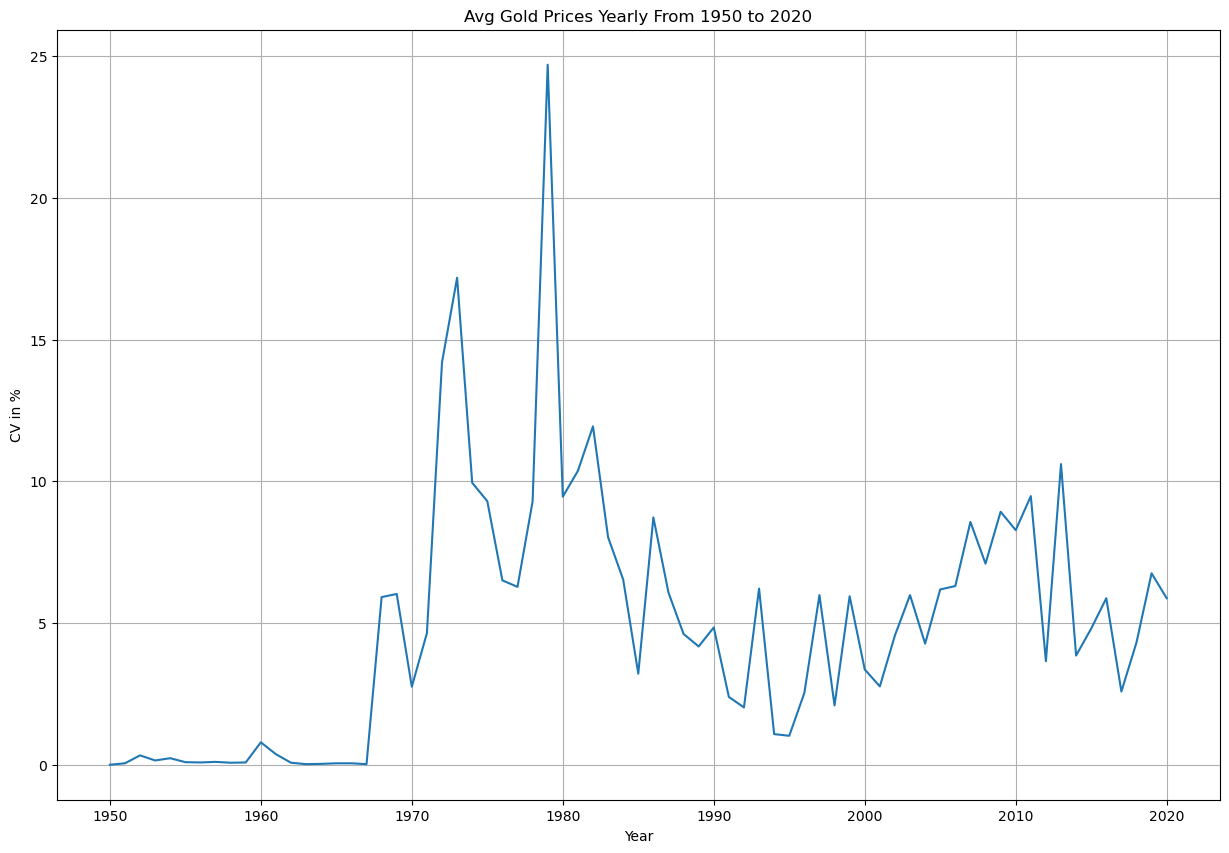

In [66]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_ptc'].plot()
plt.title("Avg Gold Prices Yearly From 1950 to 2020")
plt.ylabel('CV in %')
plt.xlabel('Year')
plt.grid()    

In [67]:
train = df[df.index.year <=2015]
test = df[df.index.year <=2015]

In [68]:
print(train.shape)
print(test.shape)

(792, 1)
(792, 1)


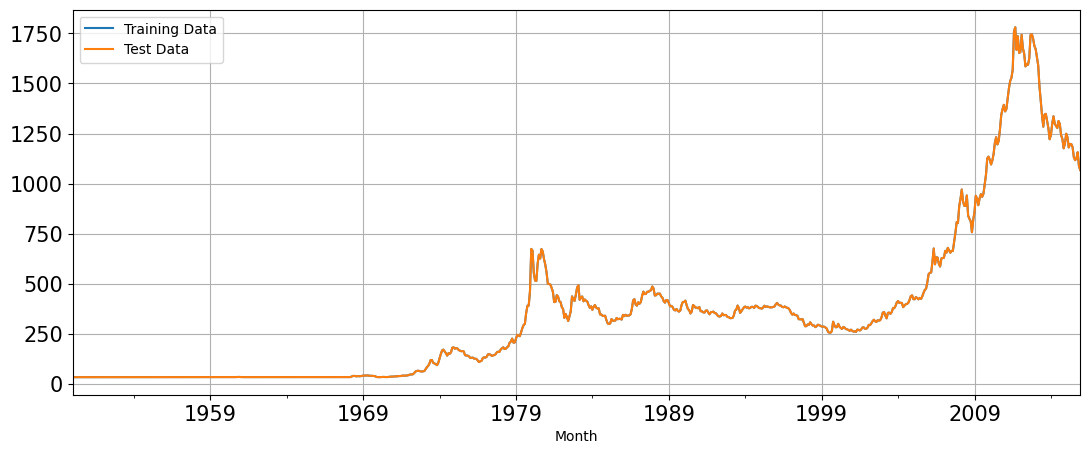

In [71]:
train['Price'].plot(figsize=(13,5), fontsize = 15)
test['Price'].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [72]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train+1) for i in range(len(test))]
len(train_time), len(test_time)

(792, 792)

In [86]:
LR_train= train.copy()
LR_test = test.copy()

In [87]:
LR_train['Time']= train_time
LR_test['Time']= test_time

In [88]:
lr = LinearRegression()
lr.fit(LR_train[['Time']],LR_train['Price'].values)

LinearRegression()

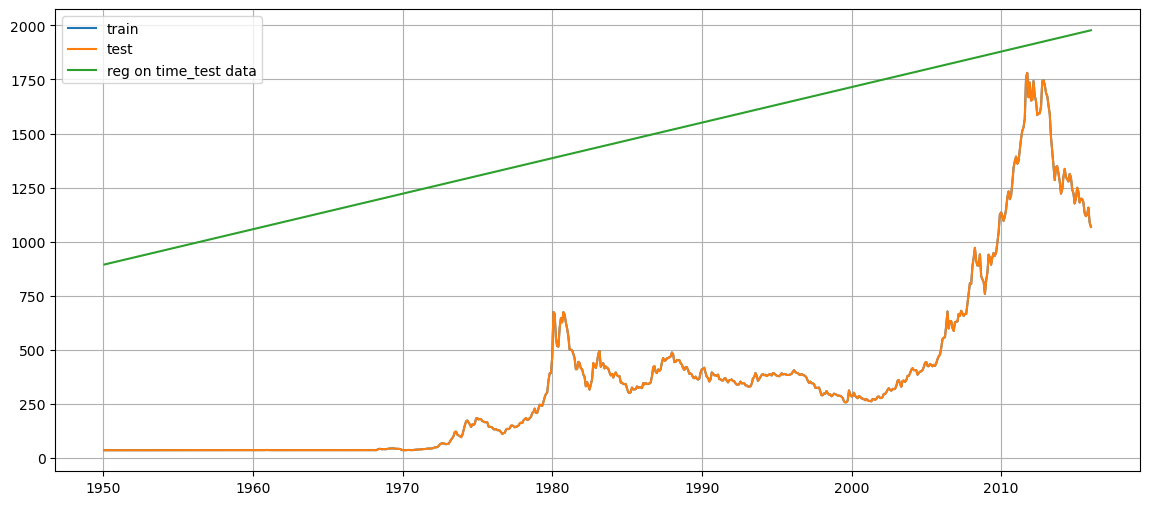

In [91]:
test_prediction_model1=lr.predict(LR_test[['Time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize= (14,6))
plt.plot(train["Price"], label = 'train')
plt.plot(test["Price"], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [95]:
def mape(actual , pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [97]:
mape_model1_test = mape(test["Price"].values,test_prediction_model1)
print("Mape is %3.3f"%(mape_model1_test),"%")

Mape is 1230.600 %


In [98]:
results = pd.DataFrame({'Test Mape': [mape_model1_test]}, index=["Regression On Time"])

In [99]:
results

,Test Mape
Regression On Time,1230.6
